In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

In [2]:
input_dir = "log/"

# Read data

In [3]:
list_of_files = [f for f in os.listdir(input_dir) if os.path.isfile(input_dir + "/" + f)]
list_of_files

['log_0.0_0.05_0.0.txt',
 'log_0.0_0.05_0.05.txt',
 'log_0.0_0.05_0.1.txt',
 'log_0.0_0.05_0.15.txt',
 'log_0.0_0.05_0.25.txt',
 'log_0.0_0.05_0.35.txt',
 'log_0.0_0.05_0.5.txt',
 'log_0.0_0.05_0.6.txt',
 'log_0.0_0.0_0.0.txt',
 'log_0.0_0.0_0.05.txt',
 'log_0.0_0.0_0.1.txt',
 'log_0.0_0.0_0.15.txt',
 'log_0.0_0.0_0.25.txt',
 'log_0.0_0.0_0.35.txt',
 'log_0.0_0.0_0.5.txt',
 'log_0.0_0.0_0.6.txt',
 'log_0.0_0.15_0.0.txt',
 'log_0.0_0.15_0.05.txt',
 'log_0.0_0.15_0.1.txt',
 'log_0.0_0.15_0.15.txt',
 'log_0.0_0.15_0.25.txt',
 'log_0.0_0.15_0.35.txt',
 'log_0.0_0.15_0.5.txt',
 'log_0.0_0.15_0.6.txt',
 'log_0.0_0.1_0.0.txt',
 'log_0.0_0.1_0.05.txt',
 'log_0.0_0.1_0.1.txt',
 'log_0.0_0.1_0.15.txt',
 'log_0.0_0.1_0.25.txt',
 'log_0.0_0.1_0.35.txt',
 'log_0.0_0.1_0.5.txt',
 'log_0.0_0.1_0.6.txt',
 'log_0.0_0.25_0.0.txt',
 'log_0.0_0.25_0.05.txt',
 'log_0.0_0.25_0.1.txt',
 'log_0.0_0.25_0.15.txt',
 'log_0.0_0.25_0.25.txt',
 'log_0.0_0.25_0.35.txt',
 'log_0.0_0.25_0.5.txt',
 'log_0.0_0.25_0.6.tx

In [4]:
len(list_of_files) # It must be 576.

576

In [5]:
pattern_quality = "^quality = (?P<quality>[0-1]\.[0-9]+)$"
pattern_coverage = "^coverage = (?P<coverage>[0-1]\.[0-9]+)$"
pattern = pattern_quality + "\n" + pattern_coverage

In [6]:
list_of_results = []

In [7]:
for file_name in list_of_files:
    file_name_parts = file_name.split("_")
    beta = float(file_name_parts[1])
    maximum_positive_overlap = float(file_name_parts[2])
    maximum_negative_overlap = float(file_name_parts[3][:-4])
    #print(beta + ", " + maximum_positive_overlap + ", " + maximum_negative_overlap)
    file = open(input_dir + "/" + file_name, "r")
    file_content = file.read()
    file.close()
    match_object = re.search(pattern, file_content, flags=re.M)
    quality = float(match_object.group("quality"))
    coverage = float(match_object.group("coverage"))
    #print(quality + ", " + coverage)
    #print("################################")
    list_of_results.append( (beta, maximum_positive_overlap, maximum_negative_overlap, quality, coverage) )

In [8]:
list_of_results

[(0.0, 0.05, 0.0, 0.08698361823361823, 0.40010683760683763),
 (0.0, 0.05, 0.05, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.1, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.15, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.25, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.35, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.5, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.6, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.0, 0.0, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.05, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.1, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.15, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.25, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.35, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.5, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.6, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.15, 0.0, 0.0874

# Plot results

## Quality (y) vs. executions (x) - Sorted by beta, pos_o and neg_o

In [9]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[0], x[1], x[2]))
results_to_plot

[(0.0, 0.0, 0.0, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.05, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.1, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.15, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.25, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.35, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.5, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.6, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.05, 0.0, 0.08698361823361823, 0.40010683760683763),
 (0.0, 0.05, 0.05, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.1, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.15, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.25, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.35, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.5, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.6, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.1, 0.0, 0.08747

In [10]:
y_values = [x[3] for x in results_to_plot]
x_values = list(range(len(results_to_plot)))

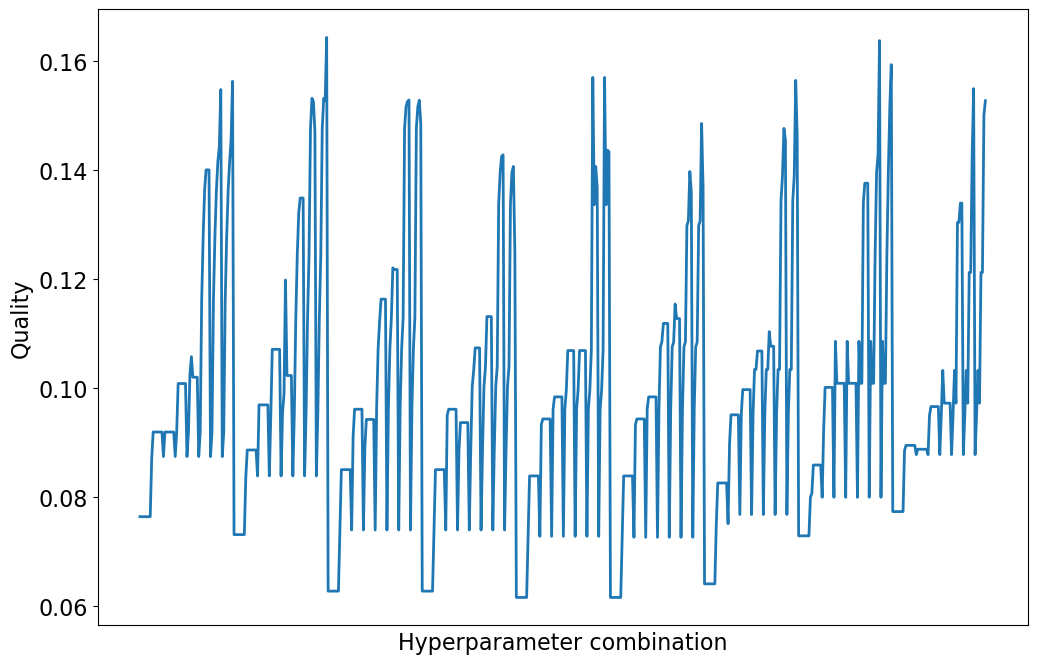

In [11]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
ax1.set_xticks([])
ax1.set_xlabel("Hyperparameter combination", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

## Coverage (y) vs. executions (x) - Sorted by beta, pos_o and neg_o

In [12]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[0], x[1], x[2]))
results_to_plot

[(0.0, 0.0, 0.0, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.05, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.1, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.15, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.25, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.35, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.5, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.6, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.05, 0.0, 0.08698361823361823, 0.40010683760683763),
 (0.0, 0.05, 0.05, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.1, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.15, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.25, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.35, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.5, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.6, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.1, 0.0, 0.08747

In [13]:
y_values = [x[4] for x in results_to_plot]
x_values = list(range(len(results_to_plot)))

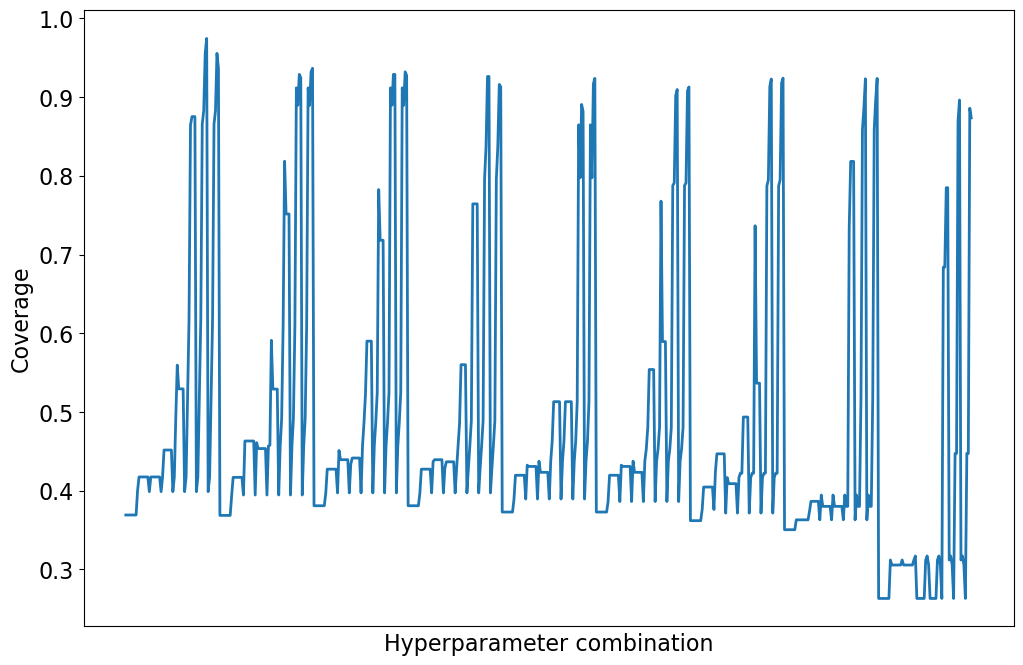

In [14]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
ax1.set_xticks([])
ax1.set_xlabel("Hyperparameter combination", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

## Quality (y) vs. beta (x) - Sorted by beta

In [15]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[0], x[3]))
results_to_plot

[(0.0, 0.0, 0.0, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.05, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.1, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.15, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.25, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.35, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.5, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.6, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.05, 0.0, 0.08698361823361823, 0.40010683760683763),
 (0.0, 0.15, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.1, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.25, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.35, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.5, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.6, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.05, 0.05, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.1, 0.0919693732193732

In [16]:
y_values = [x[3] for x in results_to_plot]
x_values = [x[0] for x in results_to_plot]

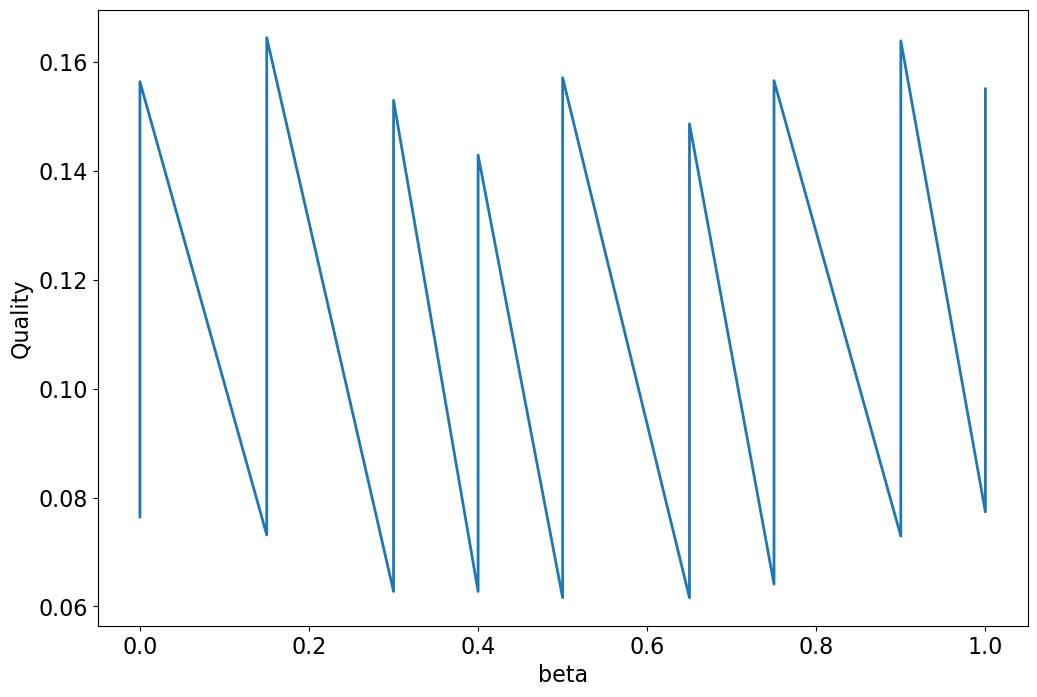

In [17]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("beta", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

In [18]:
data = [y_values[i:i + 64] for i in range(0, len(y_values), 64)]
unique_x_values = [x for i, x in enumerate(x_values) if x not in x_values[:i]]

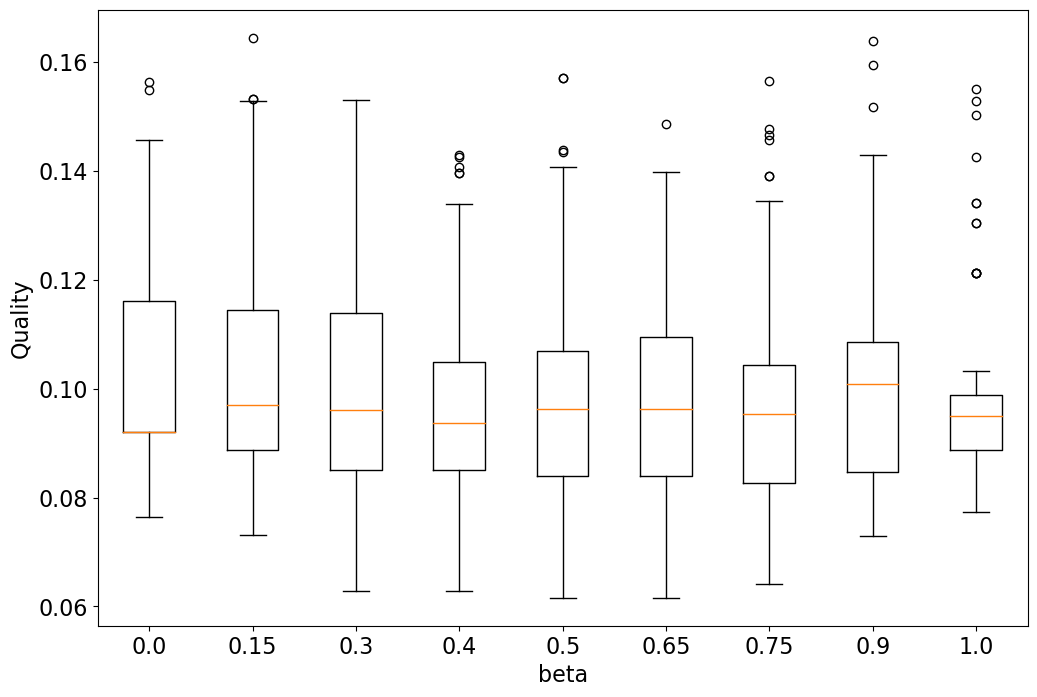

In [19]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("beta", fontsize=16)
# draw the boxplot
line1 = ax1.boxplot(data, labels = unique_x_values)

## Coverage (y) vs. beta (x) - Sorted by beta

In [20]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[0], x[4]))
results_to_plot

[(0.0, 0.0, 0.0, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.05, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.1, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.15, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.25, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.35, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.5, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.0, 0.6, 0.07643340455840457, 0.36912393162393164),
 (0.0, 0.15, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.1, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.25, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.35, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.5, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.6, 0.0, 0.0874732905982906, 0.39877136752136755),
 (0.0, 0.05, 0.0, 0.08698361823361823, 0.40010683760683763),
 (0.0, 0.05, 0.05, 0.09196937321937322, 0.41746794871794873),
 (0.0, 0.05, 0.1, 0.0919693732193732

In [21]:
y_values = [x[4] for x in results_to_plot]
x_values = [x[0] for x in results_to_plot]

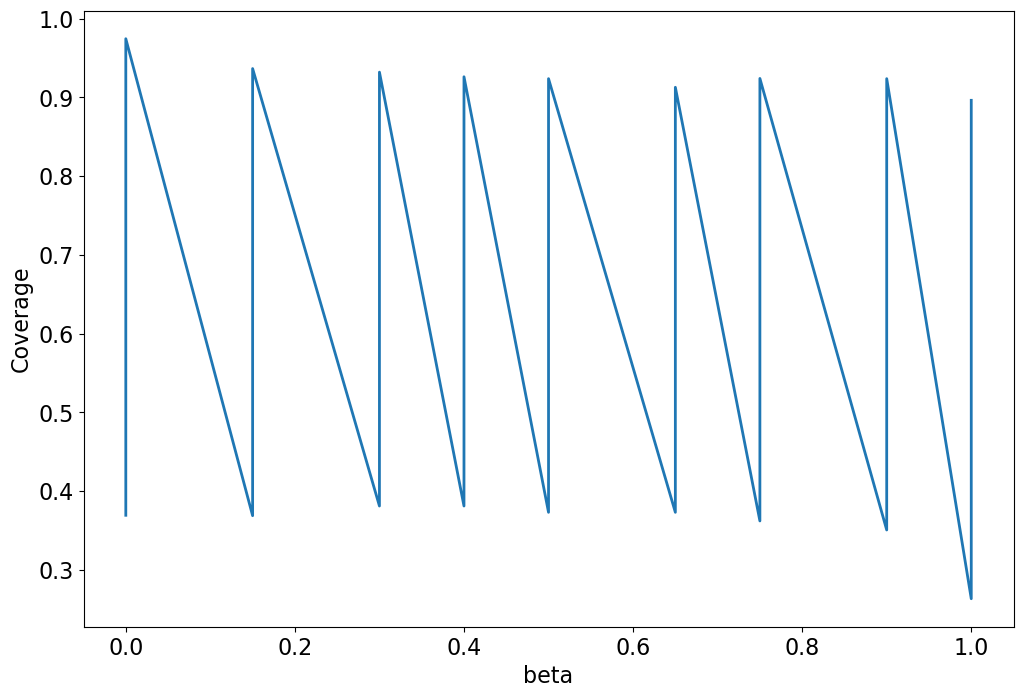

In [22]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("beta", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

In [23]:
data = [y_values[i:i + 64] for i in range(0, len(y_values), 64)]
unique_x_values = [x for i, x in enumerate(x_values) if x not in x_values[:i]]

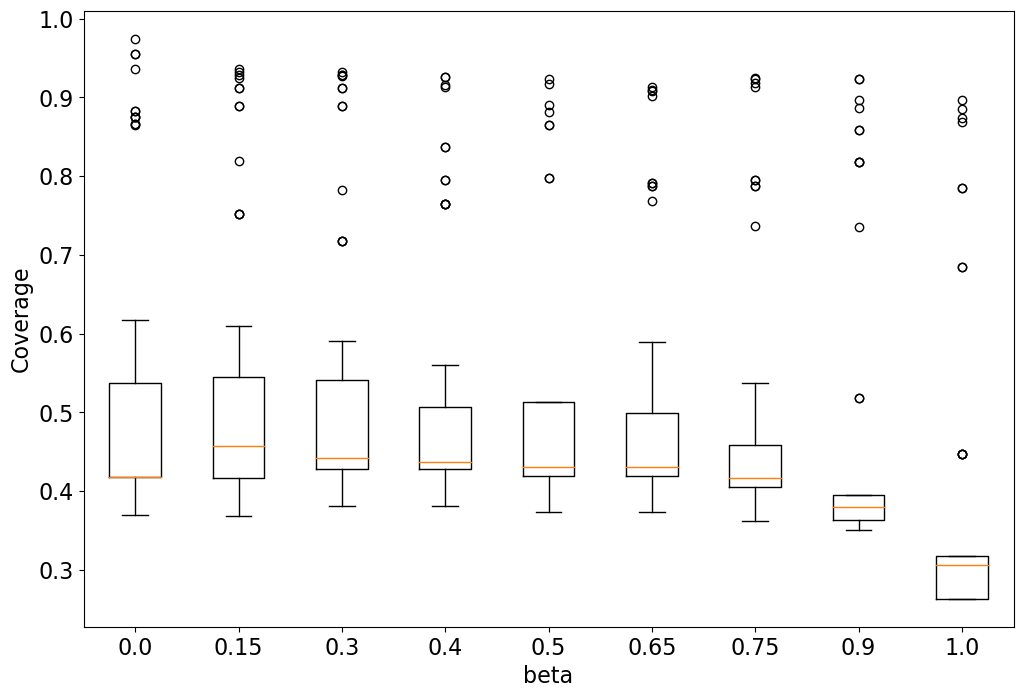

In [24]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("beta", fontsize=16)
# draw the boxplot
line1 = ax1.boxplot(data, labels = unique_x_values)

## Quality (y) vs. pos_o (x) - Sorted by pos_o

In [25]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[1], x[3]))
results_to_plot

[(0.5, 0.0, 0.0, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.05, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.1, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.15, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.25, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.35, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.5, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.6, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.0, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.05, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.1, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.15, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.25, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.35, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.5, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.6, 0.061609686609686604, 0.37286324786324787),
 (0.3, 0

In [26]:
y_values = [x[3] for x in results_to_plot]
x_values = [x[1] for x in results_to_plot]

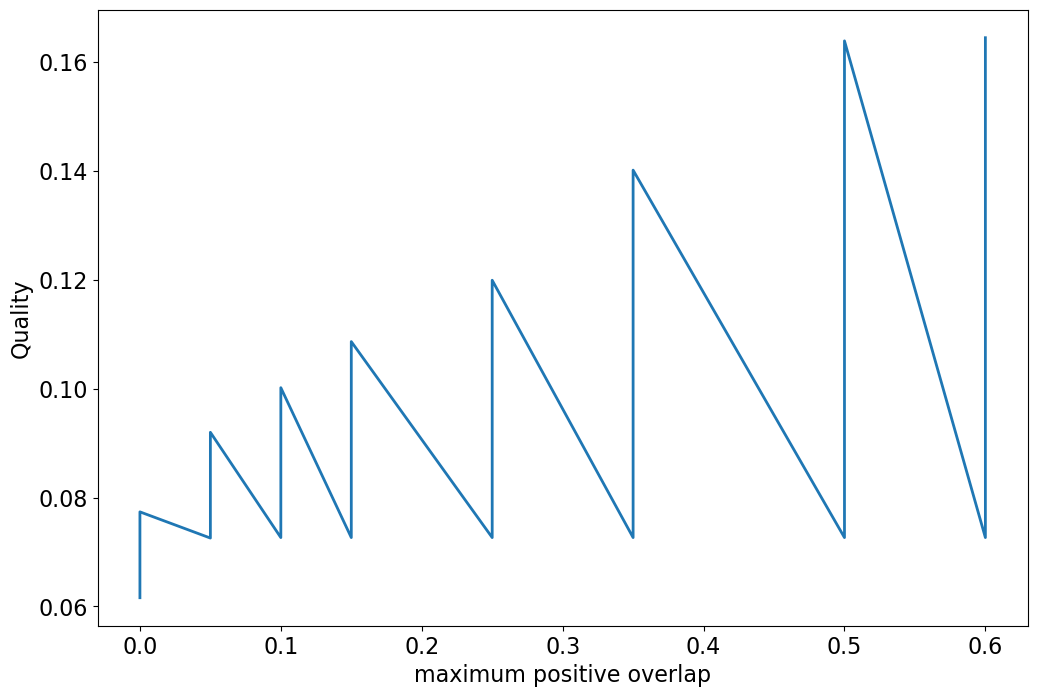

In [27]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum positive overlap", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

In [28]:
data = [y_values[i:i + 72] for i in range(0, len(y_values), 72)]
unique_x_values = [x for i, x in enumerate(x_values) if x not in x_values[:i]]

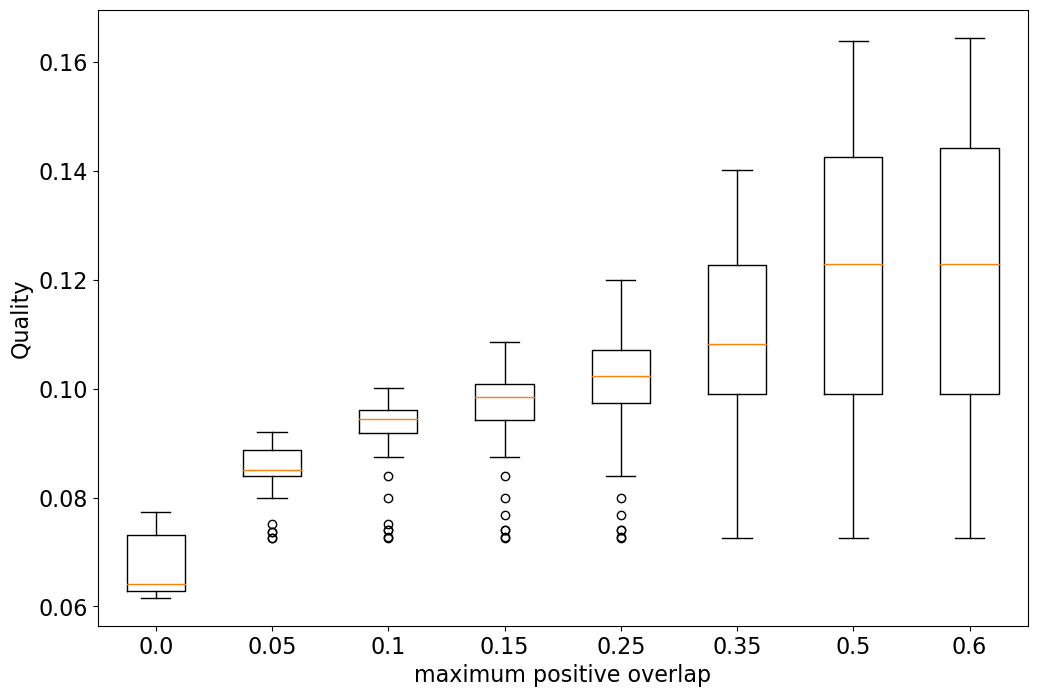

In [29]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum positive overlap", fontsize=16)
# draw the boxplot
line1 = ax1.boxplot(data, labels = unique_x_values)

## Coverage (y) vs. pos_o (x) - Sorted by pos_o

In [30]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[1], x[4]))
results_to_plot

[(1.0, 0.0, 0.0, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.05, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.1, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.15, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.25, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.35, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.5, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.6, 0.07736823361823363, 0.26308760683760685),
 (0.9, 0.0, 0.0, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.05, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.1, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.15, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.25, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.35, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.5, 0.07291666666666667, 0.3504273504273504),
 (0.9, 0.0, 0.6, 0.07291666666666667, 0.3504273504273504),
 (0.75, 0.0, 0.0, 0.0641025641025641, 0.

In [31]:
y_values = [x[4] for x in results_to_plot]
x_values = [x[1] for x in results_to_plot]

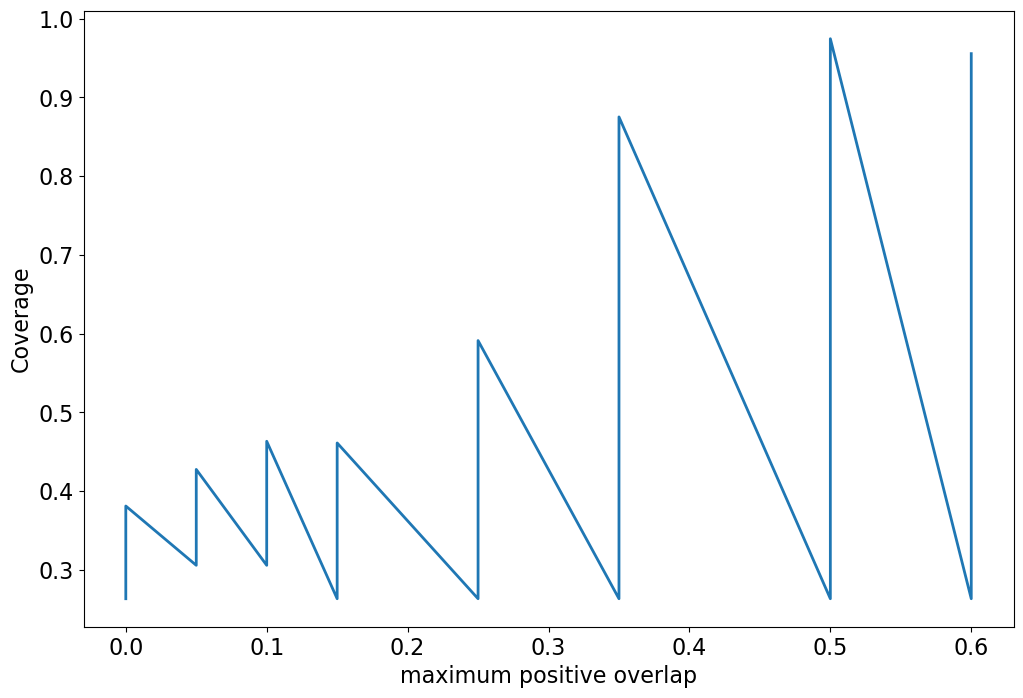

In [32]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum positive overlap", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

In [33]:
data = [y_values[i:i + 72] for i in range(0, len(y_values), 72)]
unique_x_values = [x for i, x in enumerate(x_values) if x not in x_values[:i]]

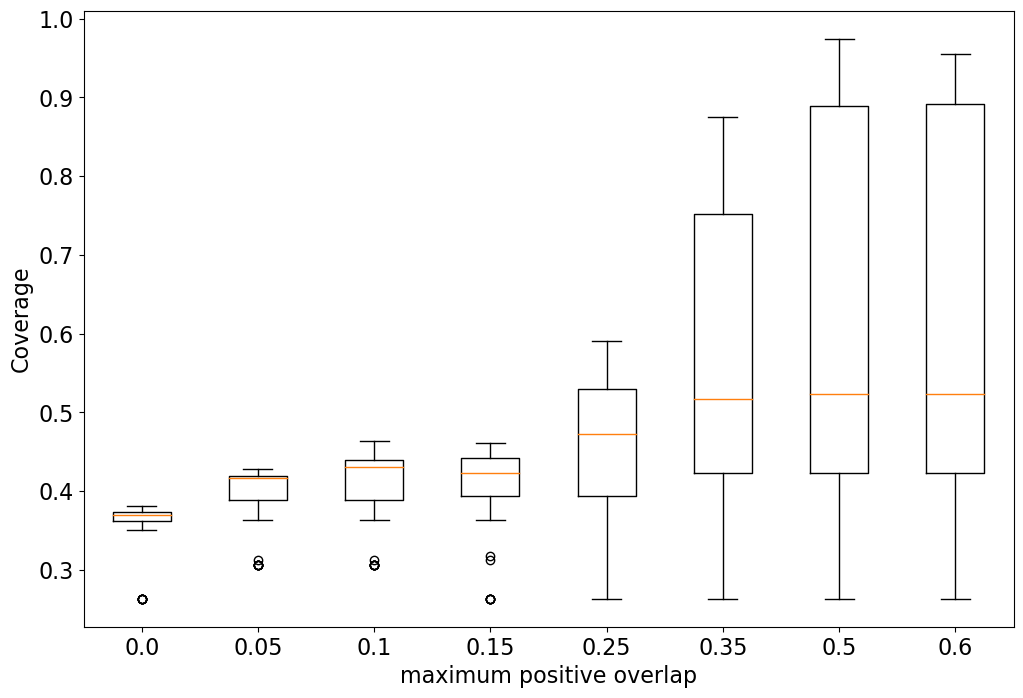

In [34]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum positive overlap", fontsize=16)
# draw the boxplot
line1 = ax1.boxplot(data, labels = unique_x_values)

## Quality (y) vs. neg_o (x) - Sorted by neg_o

In [35]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[2], x[3]))
results_to_plot

[(0.5, 0.0, 0.0, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.0, 0.061609686609686604, 0.37286324786324787),
 (0.3, 0.0, 0.0, 0.062767094017094, 0.38087606837606836),
 (0.4, 0.0, 0.0, 0.062767094017094, 0.38087606837606836),
 (0.75, 0.0, 0.0, 0.0641025641025641, 0.36191239316239315),
 (0.5, 0.05, 0.0, 0.07256054131054131, 0.3888888888888889),
 (0.65, 0.05, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.65, 0.15, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.65, 0.1, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.65, 0.25, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.65, 0.35, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.65, 0.5, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.65, 0.6, 0.0, 0.07264957264957266, 0.38621794871794873),
 (0.5, 0.15, 0.0, 0.07282763532763532, 0.3894230769230769),
 (0.5, 0.1, 0.0, 0.07282763532763532, 0.3894230769230769),
 (0.5, 0.25, 0.0, 0.07282763532763532, 0.3894230769230769),
 (0.5, 0.35, 0.0, 0.07282763532

In [36]:
y_values = [x[3] for x in results_to_plot]
x_values = [x[2] for x in results_to_plot]

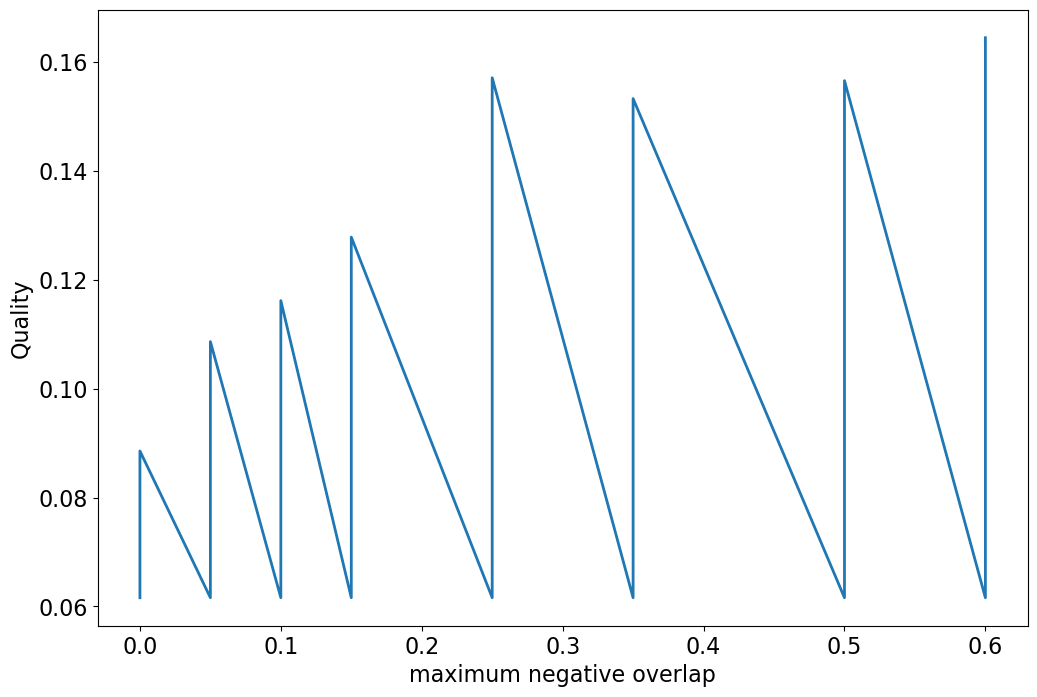

In [37]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum negative overlap", fontsize=16)
# draw the line
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

In [38]:
data = [y_values[i:i + 72] for i in range(0, len(y_values), 72)]
unique_x_values = [x for i, x in enumerate(x_values) if x not in x_values[:i]]

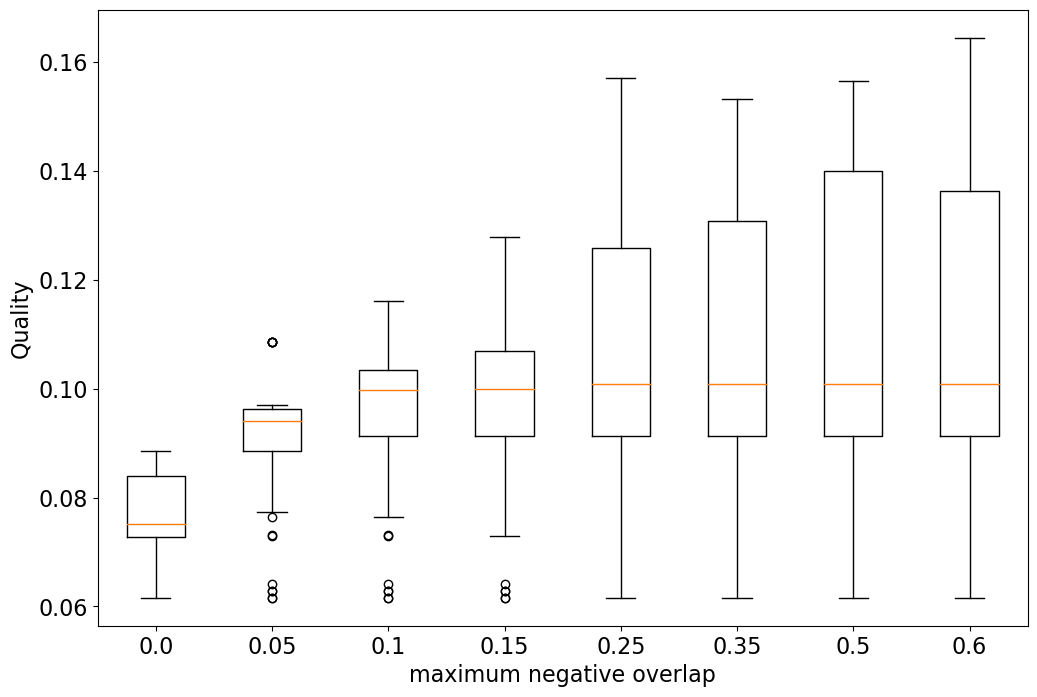

In [39]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum negative overlap", fontsize=16)
# draw the boxplot
line1 = ax1.boxplot(data, labels = unique_x_values)

## Coverage (y) vs. neg_o (x) - Sorted by neg_o

In [40]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[2], x[4]))
results_to_plot

[(1.0, 0.0, 0.0, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.05, 0.0, 0.08854166666666667, 0.31196581196581197),
 (1.0, 0.15, 0.0, 0.08782941595441596, 0.31196581196581197),
 (1.0, 0.1, 0.0, 0.08782941595441596, 0.31196581196581197),
 (1.0, 0.25, 0.0, 0.08782941595441596, 0.31196581196581197),
 (1.0, 0.35, 0.0, 0.08782941595441596, 0.31196581196581197),
 (1.0, 0.5, 0.0, 0.08782941595441596, 0.31196581196581197),
 (1.0, 0.6, 0.0, 0.08782941595441596, 0.31196581196581197),
 (0.9, 0.0, 0.0, 0.07291666666666667, 0.3504273504273504),
 (0.75, 0.0, 0.0, 0.0641025641025641, 0.36191239316239315),
 (0.9, 0.05, 0.0, 0.07999465811965811, 0.3629807692307692),
 (0.9, 0.15, 0.0, 0.07999465811965811, 0.3629807692307692),
 (0.9, 0.1, 0.0, 0.07999465811965811, 0.3629807692307692),
 (0.9, 0.25, 0.0, 0.07999465811965811, 0.3629807692307692),
 (0.9, 0.35, 0.0, 0.07999465811965811, 0.3629807692307692),
 (0.9, 0.5, 0.0, 0.07999465811965811, 0.3629807692307692),
 (0.9, 0.6, 0.0, 0.07999465811965811, 0

In [41]:
y_values = [x[4] for x in results_to_plot]
x_values = [x[2] for x in results_to_plot]

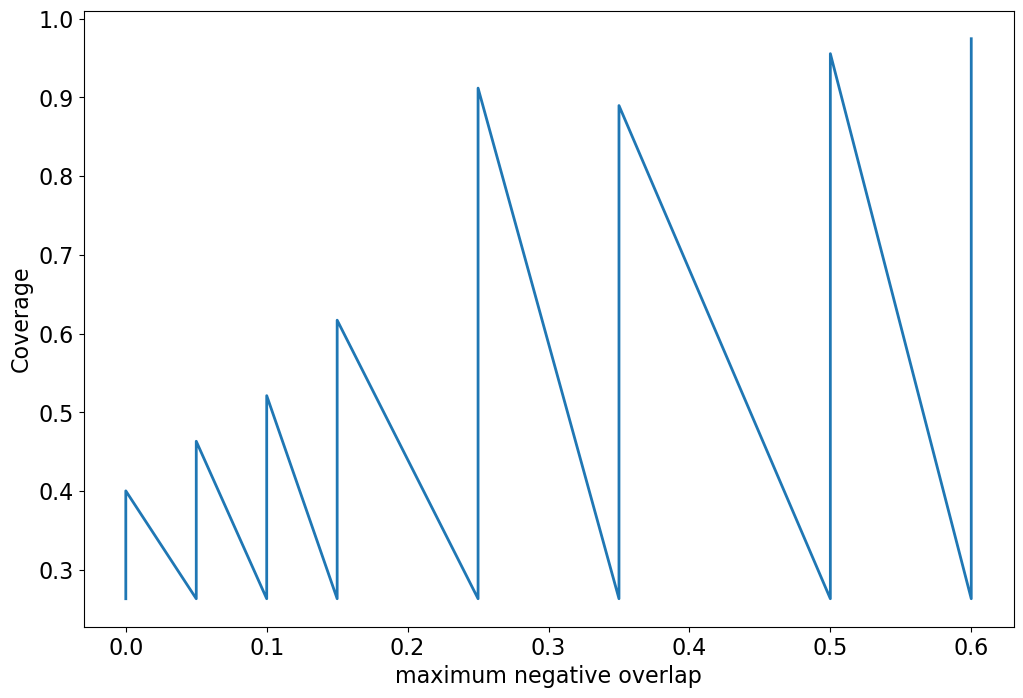

In [42]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum negative overlap", fontsize=16)
# draw the line and points
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)

In [43]:
data = [y_values[i:i + 72] for i in range(0, len(y_values), 72)]
unique_x_values = [x for i, x in enumerate(x_values) if x not in x_values[:i]]

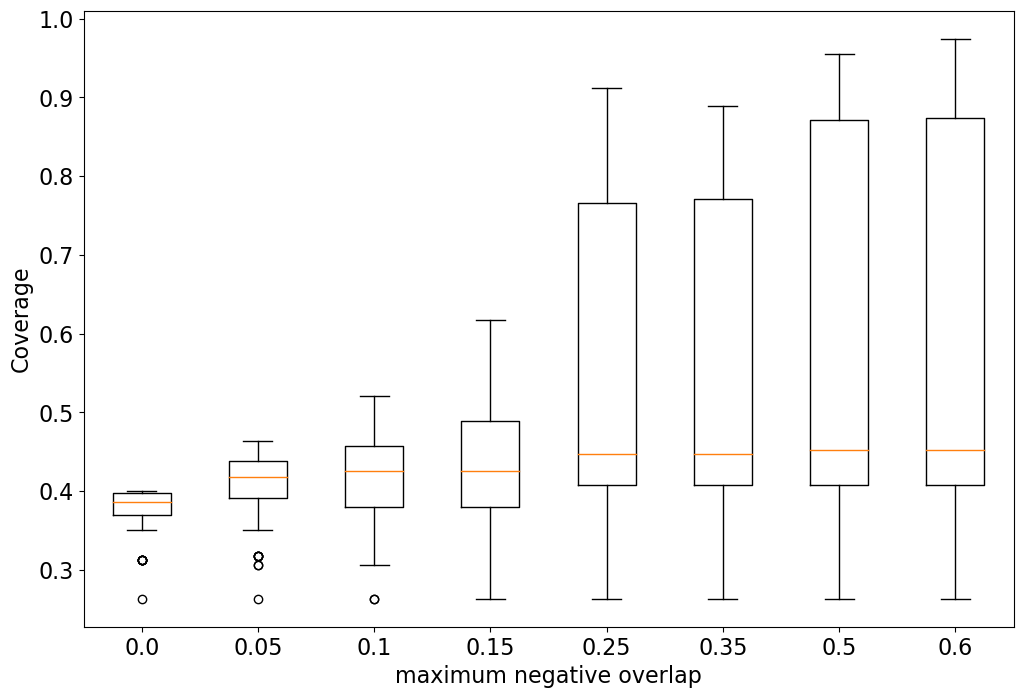

In [44]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("maximum negative overlap", fontsize=16)
# draw the boxplot
line1 = ax1.boxplot(data, labels = unique_x_values)

## Quality (y) vs. coverage (x) - Sorted by coverage

In [45]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[4], x[3]))
results_to_plot

[(1.0, 0.0, 0.0, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.05, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.1, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.15, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.25, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.35, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.5, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.0, 0.6, 0.07736823361823363, 0.26308760683760685),
 (1.0, 0.15, 0.1, 0.09664351851851853, 0.26308760683760685),
 (1.0, 0.15, 0.15, 0.09664351851851853, 0.26308760683760685),
 (1.0, 0.15, 0.25, 0.09664351851851853, 0.26308760683760685),
 (1.0, 0.15, 0.35, 0.09664351851851853, 0.26308760683760685),
 (1.0, 0.15, 0.5, 0.09664351851851853, 0.26308760683760685),
 (1.0, 0.15, 0.6, 0.09664351851851853, 0.26308760683760685),
 (1.0, 0.25, 0.15, 0.0972667378917379, 0.26308760683760685),
 (1.0, 0.25, 0.25, 0.0972667378917379, 0.26308760683760685),
 (1.0, 0.25, 0.35, 0.0972

In [46]:
maximum_quality = max(results_to_plot, key = itemgetter(3))
maximum_quality

(0.15, 0.6, 0.6, 0.16439636752136752, 0.936698717948718)

In [47]:
maximum_coverage = max(results_to_plot, key = itemgetter(4))
maximum_coverage

(0.0, 0.5, 0.6, 0.15482549857549857, 0.9746260683760684)

In [48]:
y_values = [x[3] for x in results_to_plot]
x_values = [x[4] for x in results_to_plot]

Text(0.66, 0.2, 'beta = 0.0\nmax_positive_overlap = 0.5\nmax_negative_overlap = 0.6\n\nQuality = 0.15\nCoverage = 0.97')

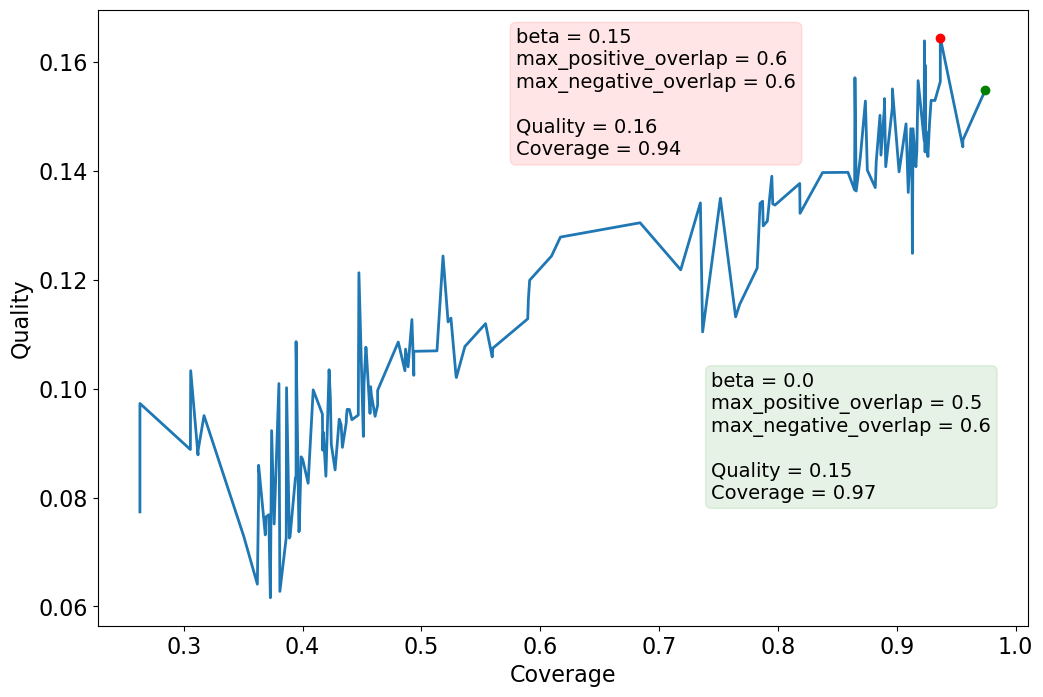

In [49]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red", "tab:green"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Quality", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("Coverage", fontsize=16)
# draw the line and points
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)
point1 = ax1.plot(maximum_quality[4], maximum_quality[3], 'ro')
point2 = ax1.plot(maximum_coverage[4], maximum_coverage[3], 'go')
# draw text
# - Best model by quality.
textstr = "beta = " + str(maximum_quality[0]) + \
          "\nmax_positive_overlap = " + str(maximum_quality[1]) + \
          "\nmax_negative_overlap = " + str(maximum_quality[2]) + \
          "\n\nQuality = " + str(round(maximum_quality[3], 2)) + \
          "\nCoverage = " + str(round(maximum_quality[4], 2))
props = dict(boxstyle='round', alpha=0.1, color="red")
ax1.text(0.45, 0.97, textstr, transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=props)
# - Best model by coverage.
textstr = "beta = " + str(maximum_coverage[0]) + \
          "\nmax_positive_overlap = " + str(maximum_coverage[1]) + \
          "\nmax_negative_overlap = " + str(maximum_coverage[2]) + \
          "\n\nQuality = " + str(round(maximum_coverage[3], 2)) + \
          "\nCoverage = " + str(round(maximum_coverage[4], 2))
props = dict(boxstyle='round', alpha=0.1, color="green")
ax1.text(0.66, 0.2, textstr, transform=ax1.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)

## Coverage (y) vs. quality (x) - Sorted by quality

In [50]:
results_to_plot = sorted(list_of_results, reverse=False, key=lambda x : (x[3], x[4]))
results_to_plot

[(0.5, 0.0, 0.0, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.05, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.1, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.15, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.25, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.35, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.5, 0.061609686609686604, 0.37286324786324787),
 (0.5, 0.0, 0.6, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.0, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.05, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.1, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.15, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.25, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.35, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.5, 0.061609686609686604, 0.37286324786324787),
 (0.65, 0.0, 0.6, 0.061609686609686604, 0.37286324786324787),
 (0.3, 0

In [51]:
maximum_coverage = max(results_to_plot, key = itemgetter(4))
maximum_coverage

(0.0, 0.5, 0.6, 0.15482549857549857, 0.9746260683760684)

In [52]:
maximum_quality = max(results_to_plot, key = itemgetter(3))
maximum_quality

(0.15, 0.6, 0.6, 0.16439636752136752, 0.936698717948718)

In [53]:
y_values = [x[4] for x in results_to_plot]
x_values = [x[3] for x in results_to_plot]

Text(0.25, 0.97, 'beta = 0.0\nmax_positive_overlap = 0.5\nmax_negative_overlap = 0.6\n\nQuality = 0.15\nCoverage = 0.97')

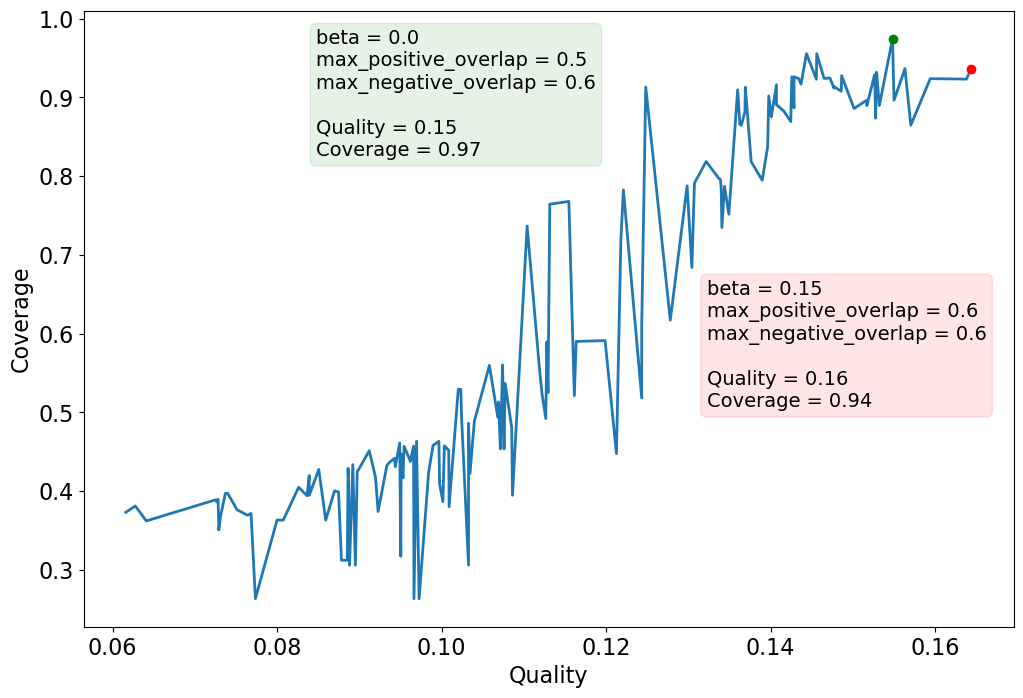

In [54]:
fig, ax1 = plt.subplots(figsize=(12,8))
matplotlib_colors = ["tab:blue", "tab:red"]
# y axis
plt.yticks(fontsize=16)
ax1.set_ylabel("Coverage", fontsize=16)
# x axis
plt.xticks(fontsize=16)
ax1.set_xlabel("Quality", fontsize=16)
# draw the line and points
line1 = ax1.plot(x_values, y_values, color=matplotlib_colors[0], linewidth=2)
point1 = ax1.plot(maximum_quality[3], maximum_quality[4], 'ro')
point2 = ax1.plot(maximum_coverage[3], maximum_coverage[4], 'go')
# draw text
# - Best model by quality.
textstr = "beta = " + str(maximum_quality[0]) + \
          "\nmax_positive_overlap = " + str(maximum_quality[1]) + \
          "\nmax_negative_overlap = " + str(maximum_quality[2]) + \
          "\n\nQuality = " + str(round(maximum_quality[3], 2)) + \
          "\nCoverage = " + str(round(maximum_quality[4], 2))
props = dict(boxstyle='round', alpha=0.1, color="red")
ax1.text(0.67, 0.35, textstr, transform=ax1.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)
# - Best model by coverage. 
textstr = "beta = " + str(maximum_coverage[0]) + \
          "\nmax_positive_overlap = " + str(maximum_coverage[1]) + \
          "\nmax_negative_overlap = " + str(maximum_coverage[2]) + \
          "\n\nQuality = " + str(round(maximum_coverage[3], 2)) + \
          "\nCoverage = " + str(round(maximum_coverage[4], 2))
props = dict(boxstyle='round', alpha=0.1, color="green")
ax1.text(0.25, 0.97, textstr, transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Get stats

In [55]:
from subgroups.quality_measures.quality_measure import QualityMeasure
from subgroups.quality_measures.wracc import WRAcc
from bitarray import bitarray
from subgroups.data_structures import SubgroupList
from subgroups.core import Subgroup
from re import compile

In [56]:
def load_diverse_topk_subgroup_lists(dataset : pd.DataFrame,
                                     TP : int,
                                     FP : int,
                                     target_attribute_name : str,
                                     target_attribute_value : str,
                                     diverse_topk_subgroup_lists_file_path : str,
                                     quality_measure : QualityMeasure):
    sl_index = 0
    sl_quality_dict = dict()
    sl_coverage_positives_dict = dict()
    sl_coverage_negatives_dict = dict()
    #sl_coverage = pd.Series([False]*len(df))
    list_of_subgroup_lists = []
    dataset_mask = (dataset[target_attribute_name] == target_attribute_value)
    number_of_dataset_instances = len(dataset)
    input_file = open(diverse_topk_subgroup_lists_file_path, "r")
    regex_object_sl_header = compile("^## Subgroup list (?P<n_subgroups>\(.*\)) ##$")
    regex_object_subgroup = compile("^s(?P<number>[0-9]+): Description: (?P<description>.+), Target: (?P<target>.+)$")
    for line in input_file:
        match_object_1 = regex_object_sl_header.fullmatch(line.rstrip("\n"))
        match_object_2 = regex_object_subgroup.fullmatch(line.rstrip("\n"))
        if match_object_1:
            list_of_subgroup_lists.append( SubgroupList(bitarray(dataset_mask.tolist(), endian = "big"), bitarray((~dataset_mask).tolist(), endian = "big"), number_of_dataset_instances) )
            sl_index = sl_index + 1
            sl_quality_dict[sl_index] = 0
            sl_coverage_positives_dict[sl_index] = pd.Series([False]*len(dataset))
            sl_coverage_negatives_dict[sl_index] = pd.Series([False]*len(dataset))
        elif match_object_2:
            subgroup = Subgroup.generate_from_str("Description: " + match_object_2.group("description") + ", Target: " + match_object_2.group("target"))
            tp_Series, fp_Series, _  = subgroup.filter(dataset)
            list_of_subgroup_lists[-1].add_subgroup(subgroup, bitarray(tp_Series.tolist(), endian = "big"), bitarray(fp_Series.tolist(), endian = "big"))
            subgroup_qm = quality_measure.compute({QualityMeasure.TRUE_POSITIVES : tp_Series.sum(), QualityMeasure.FALSE_POSITIVES : fp_Series.sum(), QualityMeasure.TRUE_POPULATION : TP, QualityMeasure.FALSE_POPULATION : FP})
            sl_quality_dict[sl_index] = sl_quality_dict[sl_index] + subgroup_qm
            sl_coverage_positives_dict[sl_index] = sl_coverage_positives_dict[sl_index] | tp_Series
            sl_coverage_negatives_dict[sl_index] = sl_coverage_negatives_dict[sl_index] | fp_Series
    input_file.close()
    return list_of_subgroup_lists, sl_quality_dict, sl_coverage_positives_dict, sl_coverage_negatives_dict

In [57]:
df = pd.read_csv("../mimic-iii-for-experiments.csv")
target = ("culture_microorganism_name_AND_susceptibility", "ENTEROCOCCUS_SP.-R")

In [58]:
TP = (df[target[0]] == target[1]).sum()
assert(TP == 1872)
FP = (df[target[0]] != target[1]).sum()
assert(FP == 1872)

## Model: 0.15, 0.6, 0.6

In [59]:
list_of_pehnotypes, sl_quality_dict, sl_coverage_positives_dict, sl_coverage_negatives_dict = \
    load_diverse_topk_subgroup_lists(df, TP, FP, target[0], target[1], "output/0.15_0.6_0.6.txt", WRAcc())

In [60]:
print("Mean quality: " + str(sum(sl_quality_dict.values())/len(sl_quality_dict.values())))
print("Total coverage: " + str((sl_coverage_positives_dict[1]|sl_coverage_positives_dict[2]|sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[1]|sl_coverage_negatives_dict[2]|sl_coverage_negatives_dict[3]).sum()/len(df)))
# ---
print("Total positive coverage: " + str((sl_coverage_positives_dict[1]|sl_coverage_positives_dict[2]|sl_coverage_positives_dict[3]).sum()/len(df)))
print("Total negative coverage: " + str((sl_coverage_negatives_dict[1]|sl_coverage_negatives_dict[2]|sl_coverage_negatives_dict[3]).sum()/len(df)))

Mean quality: 0.16439636752136752
Total coverage: 0.936698717948718
Total positive coverage: 0.4855769230769231
Total negative coverage: 0.4511217948717949


In [61]:
# Overlap between phenotype 1 and 2.
print("Coverage: " + str(((sl_coverage_positives_dict[1]|sl_coverage_negatives_dict[1])&(sl_coverage_positives_dict[2]|sl_coverage_negatives_dict[2])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[1]&sl_coverage_positives_dict[2]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[1]&sl_coverage_negatives_dict[2]).sum()/len(df)))

Coverage: 0.5539529914529915
Positive coverage: 0.3346688034188034
Negative coverage: 0.21928418803418803


In [62]:
# Overlap between phenotype 1 and 3.
print("Coverage: " + str(((sl_coverage_positives_dict[1]|sl_coverage_negatives_dict[1])&(sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[3])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[1]&sl_coverage_positives_dict[3]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[1]&sl_coverage_negatives_dict[3]).sum()/len(df)))

Coverage: 0.47649572649572647
Positive coverage: 0.3125
Negative coverage: 0.1639957264957265


In [63]:
# Overlap between phenotype 2 and 3.
print("Coverage: " + str(((sl_coverage_positives_dict[2]|sl_coverage_negatives_dict[2])&(sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[3])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[2]&sl_coverage_positives_dict[3]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[2]&sl_coverage_negatives_dict[3]).sum()/len(df)))

Coverage: 0.4078525641025641
Positive coverage: 0.27350427350427353
Negative coverage: 0.1343482905982906


In [64]:
# Overlap between phenotype 1, 2 and 3.
print("Coverage: " + str((((sl_coverage_positives_dict[1]|sl_coverage_negatives_dict[1]))&(sl_coverage_positives_dict[2]|sl_coverage_negatives_dict[2])&(sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[3])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[1]&sl_coverage_positives_dict[2]&sl_coverage_positives_dict[3]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[1]&sl_coverage_negatives_dict[2]&sl_coverage_negatives_dict[3]).sum()/len(df)))

Coverage: 0.37553418803418803
Positive coverage: 0.2588141025641026
Negative coverage: 0.11672008547008547


## Model: 0.0, 0.5, 0.6

In [65]:
list_of_pehnotypes, sl_quality_dict, sl_coverage_positives_dict, sl_coverage_negatives_dict = \
    load_diverse_topk_subgroup_lists(df, TP, FP, target[0], target[1], "output/0.0_0.5_0.6.txt", WRAcc())

In [66]:
print("Mean quality: " + str(sum(sl_quality_dict.values())/len(sl_quality_dict.values())))
print("Total coverage: " + str((sl_coverage_positives_dict[1]|sl_coverage_positives_dict[2]|sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[1]|sl_coverage_negatives_dict[2]|sl_coverage_negatives_dict[3]).sum()/len(df)))
# ---
print("Total positive coverage: " + str((sl_coverage_positives_dict[1]|sl_coverage_positives_dict[2]|sl_coverage_positives_dict[3]).sum()/len(df)))
print("Total negative coverage: " + str((sl_coverage_negatives_dict[1]|sl_coverage_negatives_dict[2]|sl_coverage_negatives_dict[3]).sum()/len(df)))

Mean quality: 0.15482549857549857
Total coverage: 0.9746260683760684
Total positive coverage: 0.4965277777777778
Total negative coverage: 0.4780982905982906


In [67]:
# Overlap between phenotype 1 and 2.
print("Coverage: " + str(((sl_coverage_positives_dict[1]|sl_coverage_negatives_dict[1])&(sl_coverage_positives_dict[2]|sl_coverage_negatives_dict[2])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[1]&sl_coverage_positives_dict[2]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[1]&sl_coverage_negatives_dict[2]).sum()/len(df)))

Coverage: 0.6159188034188035
Positive coverage: 0.36164529914529914
Negative coverage: 0.25427350427350426


In [68]:
# Overlap between phenotype 1 and 3.
print("Coverage: " + str(((sl_coverage_positives_dict[1]|sl_coverage_negatives_dict[1])&(sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[3])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[1]&sl_coverage_positives_dict[3]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[1]&sl_coverage_negatives_dict[3]).sum()/len(df)))

Coverage: 0.5170940170940171
Positive coverage: 0.31463675213675213
Negative coverage: 0.20245726495726496


In [69]:
# Overlap between phenotype 2 and 3.
print("Coverage: " + str(((sl_coverage_positives_dict[2]|sl_coverage_negatives_dict[2])&(sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[3])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[2]&sl_coverage_positives_dict[3]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[2]&sl_coverage_negatives_dict[3]).sum()/len(df)))

Coverage: 0.6380876068376068
Positive coverage: 0.3704594017094017
Negative coverage: 0.2676282051282051


In [70]:
# Overlap between phenotype 1, 2 and 3.
print("Coverage: " + str((((sl_coverage_positives_dict[1]|sl_coverage_negatives_dict[1]))&(sl_coverage_positives_dict[2]|sl_coverage_negatives_dict[2])&(sl_coverage_positives_dict[3]|sl_coverage_negatives_dict[3])).sum()/len(df)))
print("Positive coverage: " + str((sl_coverage_positives_dict[1]&sl_coverage_positives_dict[2]&sl_coverage_positives_dict[3]).sum()/len(df)))
print("Negative coverage: " + str((sl_coverage_negatives_dict[1]&sl_coverage_negatives_dict[2]&sl_coverage_negatives_dict[3]).sum()/len(df)))

Coverage: 0.4911858974358974
Positive coverage: 0.3058226495726496
Negative coverage: 0.18536324786324787
